In [1]:
import numpy as np
from reader import *
from process import *
from plot_range_profile import *

In [14]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [6]:
radar = Process()
radar.fft_1['r0'].shape

(128, 256, 100)

In [23]:
mat = radar.fft_1['r0'][:,:,10]
np.sum(mat, axis=0).shape


(256,)

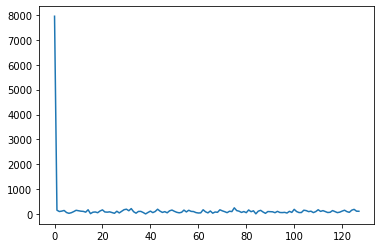

In [13]:
mat = np.abs(np.array(radar.fft_1['r0']))
plt.plot(mat[:,3,80])
plt.show()

In [18]:
def estimate_range(rx_index=0, chirp=0):
    c = 3 * (10 ** 8)
    sample_rate = 10000
    frequency_slope = 29.0041
    num_range_bins = 256
    range_factor = c * sample_rate * 1000 / (2 * frequency_slope * 10**12 * num_range_bins)
    # # 
    
    def animate(frame):
        ax.clear()
        # y = np.abs(self.FFTcell[rx,:,chirp,frame])
        mat = np.abs(np.array(radar.fft_1[f'r{rx_index}']))
        y = np.abs(mat[chirp, :, frame])
        x = np.arange(0, len(y), 1)
        range_meter = x * range_factor
        print(f"frame={frame}")
        ax.set_xlim(0, 50)
        ax.set_ylim(0, 20000)            
        # ax.plot(10 * np.log(np.abs(self.FFTcell[rx,:,chirp,frame])))
        ax.plot(range_meter, y)
        ax.set_title(f'Range Estimation, frame:{frame}')
        ax.set_xlabel('Samples')
        ax.set_ylabel('Chirps')
        ax.grid()
    
    fig, ax = plt.subplots()
    ani = FuncAnimation(fig, animate, frames=100, interval=500, repeat=True)
    plt.show()

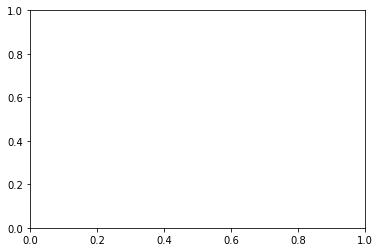

In [20]:
estimate_range(rx_index=0, chirp=0)